In [3]:
import pandas as pd
df = pd.read_csv("C:/Users/dirty/OneDrive/Desktop/car_price_prediction_.csv")
print(df.head())

   Car ID  Brand  Year  Engine Size Fuel Type Transmission  Mileage Condition  \
0       1  Tesla  2016          2.3    Petrol       Manual   114832       New   
1       2    BMW  2018          4.4  Electric       Manual   143190      Used   
2       3   Audi  2013          4.5  Electric       Manual   181601       New   
3       4  Tesla  2011          4.1    Diesel    Automatic    68682       New   
4       5   Ford  2009          2.6    Diesel       Manual   223009  Like New   

      Price     Model  
0  26613.92   Model X  
1  14679.61  5 Series  
2  44402.61        A4  
3  86374.33   Model Y  
4  73577.10   Mustang  


In [4]:
df.describe()

,Car ID,Year,Engine Size,Mileage,Price
count,2500.00000,2500.0000,2500.000000,2500.000000,2500.000000
mean,1250.50000,2011.6268,3.465240,149749.844800,52638.022532
std,721.83216,6.9917,1.432053,87919.952034,27295.833455
min,1.00000,2000.0000,1.000000,15.000000,5011.270000
25%,625.75000,2005.0000,2.200000,71831.500000,28908.485000
50%,1250.50000,2012.0000,3.400000,149085.000000,53485.240000
75%,1875.25000,2018.0000,4.700000,225990.500000,75838.532500
max,2500.00000,2023.0000,6.000000,299967.000000,99982.590000


In [5]:
df.isnull().sum()

Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

In [8]:
!pip install seaborn

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

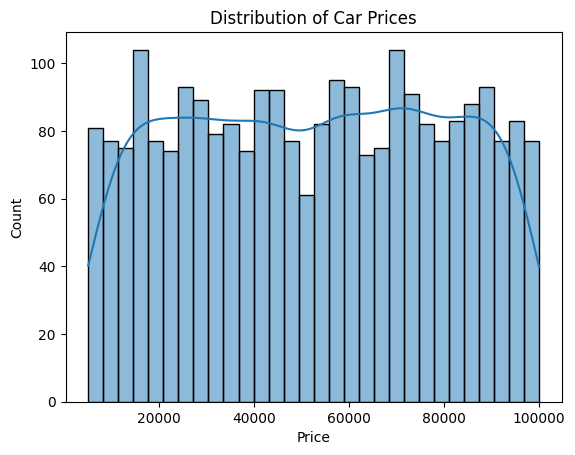

In [10]:
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

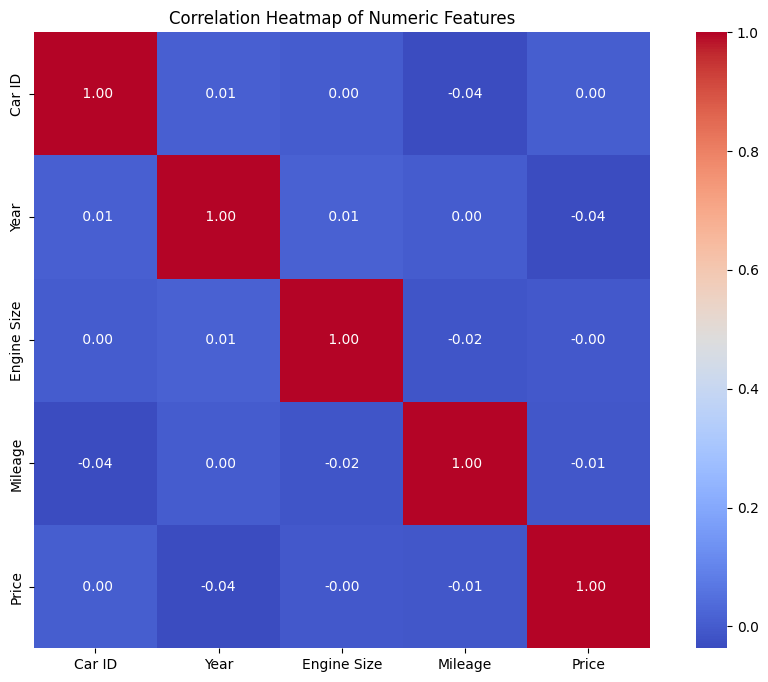

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, fmt=" .2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [4]:
import pandas as pd

df = pd.read_csv("C:/Users/dirty/OneDrive/Desktop/car_price_prediction_.csv")

# Example: expensive if price >= median
threshold = df['Price'].median()
df['label'] = (df['Price'] >= threshold).astype(int)

X = df.drop(['Price', 'label'], axis=1)
y = df['label']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

In [6]:
import numpy as np
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

In [10]:
!pip install scikit-learn

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [14]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {"Logistic Regression": log_reg, "SVM": svm_model}

for name, model in models.items():
    preds = model.predict(X_test)
    print("\n", name)
    print("Accuracy:", accuracy_score(y_test, preds))
    print(classification_report(y_test, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))


 Logistic Regression
Accuracy: 0.4928
              precision    recall  f1-score   support

           0       0.49      0.47      0.48       313
           1       0.49      0.52      0.51       312

    accuracy                           0.49       625
   macro avg       0.49      0.49      0.49       625
weighted avg       0.49      0.49      0.49       625

Confusion Matrix:
 [[146 167]
 [150 162]]

 SVM
Accuracy: 0.4944
              precision    recall  f1-score   support

           0       0.49      0.46      0.48       313
           1       0.49      0.53      0.51       312

    accuracy                           0.49       625
   macro avg       0.49      0.49      0.49       625
weighted avg       0.49      0.49      0.49       625

Confusion Matrix:
 [[143 170]
 [146 166]]


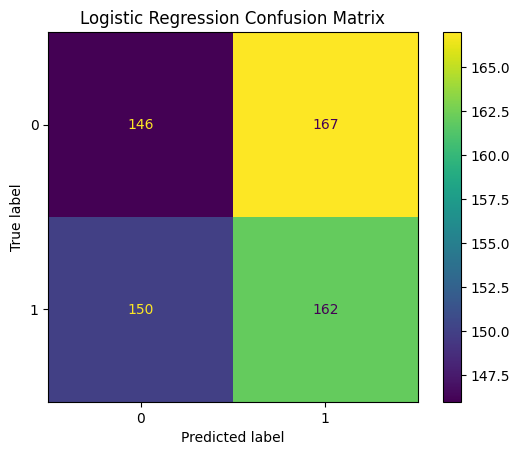

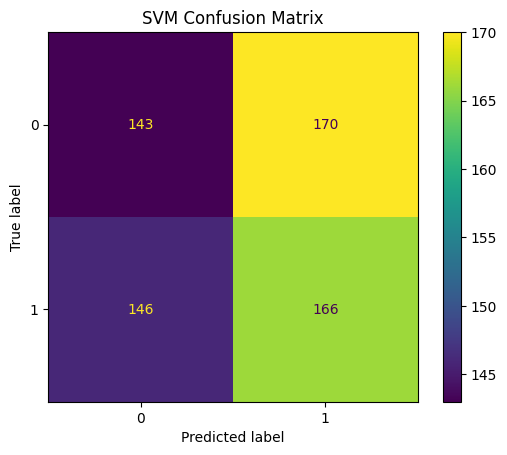

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

for name, model in models.items():
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.title(name + " Confusion Matrix")
    plt.show()

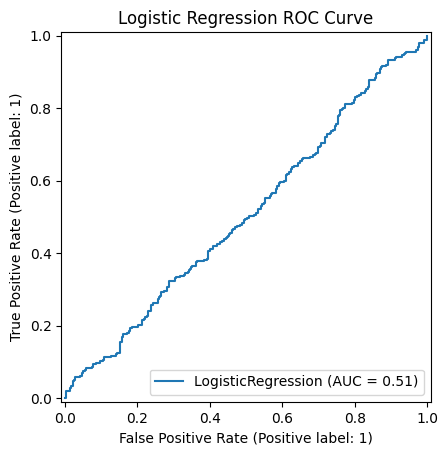

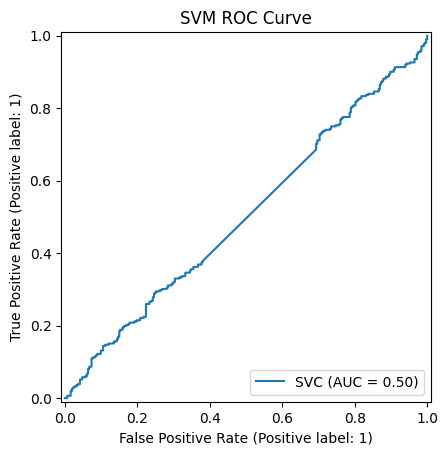

In [17]:
from sklearn.metrics import RocCurveDisplay

for name, model in models.items():
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(name + " ROC Curve")
    plt.show()

In [18]:
from sklearn.model_selection import GridSearchCV

log_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

log_grid = GridSearchCV(LogisticRegression(max_iter=2000), log_params, cv=5)
log_grid.fit(X_train, y_train)

print("Best LR params:", log_grid.best_params_)

Best LR params: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


In [19]:
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(SVC(probability=True), svm_params, cv=5)
svm_grid.fit(X_train, y_train)

print("Best SVM params:", svm_grid.best_params_)

Best SVM params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [20]:
import numpy as np

coeff = log_reg.coef_[0]
features = X.columns

importance = pd.DataFrame({
    'feature': features,
    'weight': coeff
}).sort_values('weight', ascending=False)

print(importance)

                feature    weight
4             Brand_BMW  0.200381
18             Model_A4  0.051134
31            Model_GLC  0.043142
29          Model_Focus  0.041071
28            Model_Fit  0.037373
0                Car ID  0.031612
22          Model_Camry  0.029096
24        Model_Corolla  0.022722
14        Condition_New  0.013421
35        Model_Model Y  0.012865
32        Model_Model 3  0.012596
26       Model_Explorer  0.003211
23          Model_Civic -0.006289
30            Model_GLA -0.007053
13  Transmission_Manual -0.009664
19         Model_Accord -0.014278
15       Condition_Used -0.017371
20        Model_C-Class -0.021614
6           Brand_Honda -0.022406
27         Model_Fiesta -0.023352
8           Brand_Tesla -0.024031
2           Engine Size -0.024530
7        Brand_Mercedes -0.025742
33        Model_Model S -0.027838
38             Model_Q5 -0.028215
5            Brand_Ford -0.028806
3               Mileage -0.031709
9          Brand_Toyota -0.039171
34        Mode

In [21]:
from sklearn.decomposition import PCA
import numpy as np

# Reduce to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Shape after PCA:", X_pca.shape)

Shape after PCA: (2500, 2)


In [22]:
from sklearn.model_selection import train_test_split

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.25, random_state=42, stratify=y
)

In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_pca, y_train_pca)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [24]:
import matplotlib.pyplot as plt
import numpy as np

In [25]:
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)

In [26]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

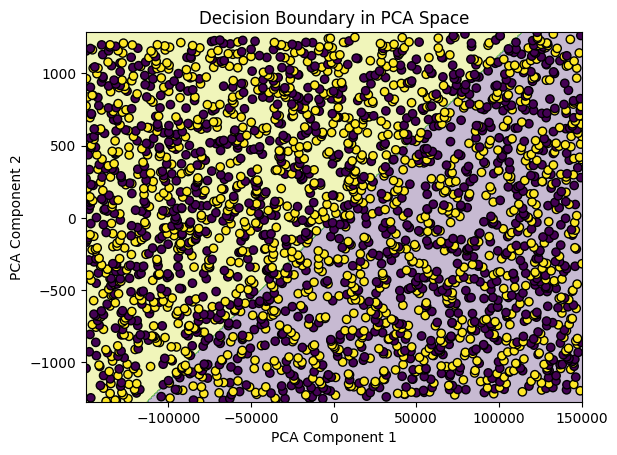

In [28]:
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Decision Boundary in PCA Space")
plt.show()

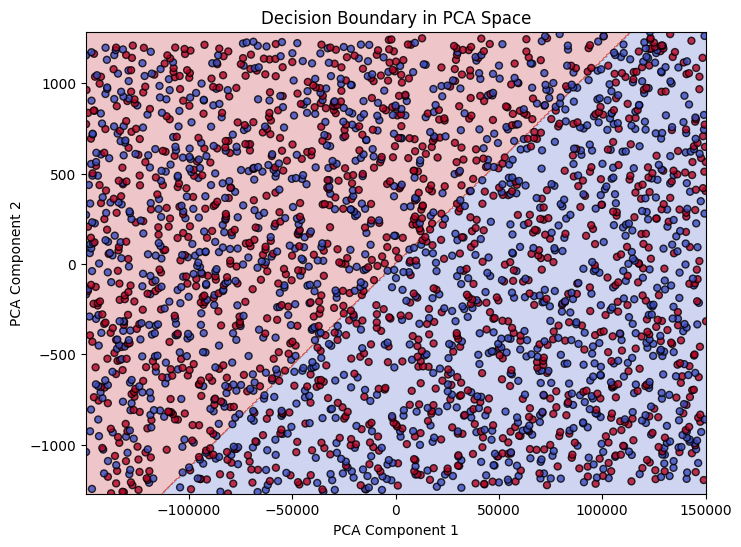

In [29]:
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.25, cmap='coolwarm', levels=20)
plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=y, cmap='coolwarm',
    edgecolor='black', alpha=0.8, s=25
)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Decision Boundary in PCA Space")
plt.show()

In [30]:
print(X_pca.shape)

(2500, 2)


In [31]:
print(np.unique(Z))

[0 1]


In [32]:
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

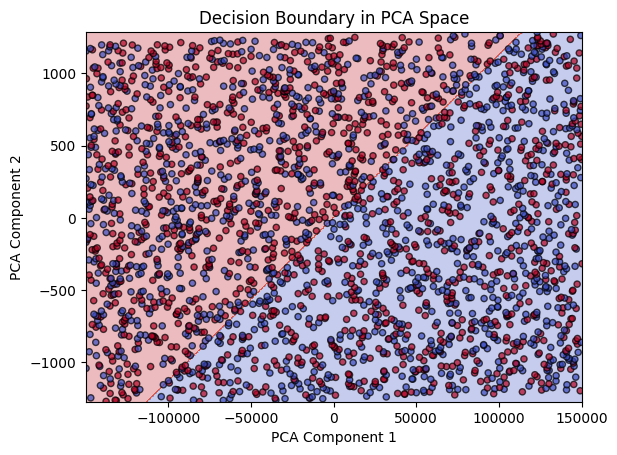

In [33]:
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3, levels=20)
plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=y, cmap='coolwarm',
    s=20, edgecolor='k', alpha=0.7
)

plt.title("Decision Boundary in PCA Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

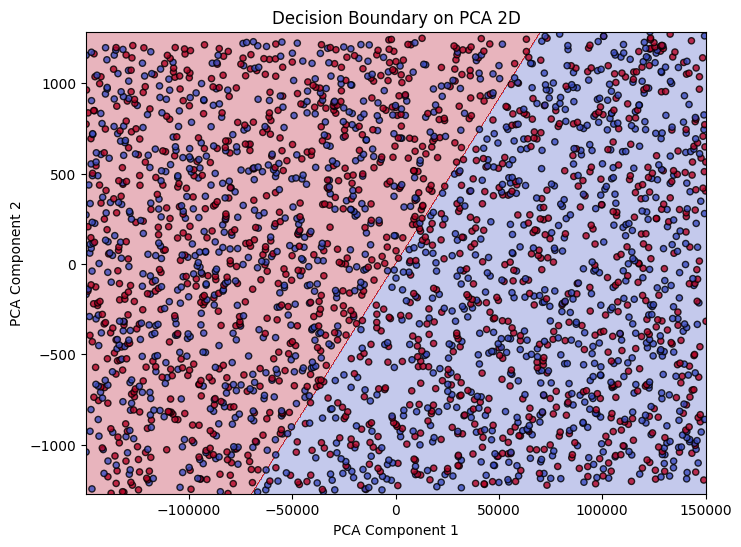

In [34]:
from sklearn.linear_model import LogisticRegression
model_pca = LogisticRegression()
model_pca.fit(X_pca, y)
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000),
                     np.linspace(y_min, y_max, 1000))
Z = model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3, levels=100)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', s=20, edgecolor='k', alpha=0.8)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Decision Boundary on PCA 2D")
plt.show()


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import pandas as pd

models = {"Logistic Regression": log_reg, "SVM": svm_model}

summary = []

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:,1]  # probability for ROC/AUC
    
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"AUC: {auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


=== Logistic Regression ===
Accuracy: 0.4928
AUC: 0.5065
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.47      0.48       313
           1       0.49      0.52      0.51       312

    accuracy                           0.49       625
   macro avg       0.49      0.49      0.49       625
weighted avg       0.49      0.49      0.49       625

Confusion Matrix:
[[146 167]
 [150 162]]

=== SVM ===
Accuracy: 0.4944
AUC: 0.4872
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.46      0.48       313
           1       0.49      0.53      0.51       312

    accuracy                           0.49       625
   macro avg       0.49      0.49      0.49       625
weighted avg       0.49      0.49      0.49       625

Confusion Matrix:
[[143 170]
 [146 166]]
